In [51]:
from glob import glob
import os
import numpy as np
import logging
import daiquiri
import matplotlib.pyplot as plt

daiquiri.setup(level=logging.DEBUG)
logger = daiquiri.getLogger(__name__)

def visual(src_dir, instance_i=0, ep=16):
    
    def get_file_list(src_dir, dataset, method, ep):
        file_list = []
        for model in ['cnn', 'caps', 'caps_r']:
            if method == 'FGSM':
                file_list += glob(os.path.join(src_dir, model, dataset, '*BIM_eps'+str(ep)+'*'))
            else:
                file_list += glob(os.path.join(src_dir, model, dataset, '*'+method+'*iter'+str(ep)+'*'))
        logger.debug(file_list)
        return file_list
    
    MNIST_FGSM_file_list = get_file_list(src_dir, 'mnist', 'FGSM', ep)
    MNIST_BIM_file_list = get_file_list(src_dir, 'mnist', 'BIM', ep)
    MNIST_ILLCM_file_list = get_file_list(src_dir, 'mnist', 'ILLCM', ep)
    MNIST_file_list = MNIST_FGSM_file_list + MNIST_BIM_file_list + MNIST_ILLCM_file_list
    
    CIFAR10_FGSM_file_list = get_file_list(src_dir, 'cifar10', 'FGSM', ep)
    CIFAR10_BIM_file_list = get_file_list(src_dir, 'cifar10', 'BIM', ep)
    CIFAR10_ILLCM_file_list = get_file_list(src_dir, 'cifar10', 'ILLCM', ep)
    CIFAR10_file_list = CIFAR10_FGSM_file_list + CIFAR10_BIM_file_list + CIFAR10_ILLCM_file_list
    

    MNIST_canvas = np.ones((28, 30*9))
    labels = np.ones((1, 9), dtype=int) * -1
    for idx, col in enumerate(MNIST_file_list):
        with np.load(col) as f:
            x, y = f['x'], f['y'];
            x = np.squeeze(x)
            logger.debug("{} {}".format(x[instance_i].shape, y[instance_i].shape))
            
            MNIST_canvas[:, idx*30+1:idx*30+29] = x[instance_i]
            labels[:, idx] = y[instance_i]
    
    # plot
    fig, ax = plt.subplots(figsize=(10, 9))
    ax.imshow(MNIST_canvas, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  
    ax.axis('off')
    plt.tight_layout()
    plt.show()
    fig.savefig('mnist.png')
    logger.info(labels)

    CIFAR10_canvas = np.ones((28, 30*9, 3))
    labels = np.ones((1, 9), dtype=int) * -1
    for idx, col in enumerate(CIFAR10_file_list):
        with np.load(col) as f:
            x, y = f['x'], f['y'];
            x = np.squeeze(x)
            logger.debug("{} {}".format(x[instance_i].shape, y[instance_i].shape))
            
            CIFAR10_canvas[:, idx*30+1:idx*30+29] = x[instance_i]
            labels[:, idx] = y[instance_i]
    
    # plot
    fig, ax = plt.subplots(figsize=(10, 9))
    ax.imshow(CIFAR10_canvas)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  
    ax.axis('off')
    plt.tight_layout()
    plt.show()
    fig.savefig('cifar10.png')
    logger.info(labels)
    

2019-03-04 07:25:01,171 [4992] DEBUG    __main__: ['/Users/xu/Storage/data/cnn/mnist/test_BIM_eps16_iter1.npz', '/Users/xu/Storage/data/caps/mnist/test_BIM_eps16_iter1.npz', '/Users/xu/Storage/data/caps_r/mnist/test_BIM_eps16_iter1.npz']
2019-03-04 07:25:01,176 [4992] DEBUG    __main__: ['/Users/xu/Storage/data/cnn/mnist/test_BIM_eps1_iter16.npz', '/Users/xu/Storage/data/caps/mnist/test_BIM_eps1_iter16.npz', '/Users/xu/Storage/data/caps_r/mnist/test_BIM_eps1_iter16.npz']
2019-03-04 07:25:01,179 [4992] DEBUG    __main__: ['/Users/xu/Storage/data/cnn/mnist/test_ILLCM_eps1_iter16.npz', '/Users/xu/Storage/data/caps/mnist/test_ILLCM_eps1_iter16.npz', '/Users/xu/Storage/data/caps_r/mnist/test_ILLCM_eps1_iter16.npz']
2019-03-04 07:25:01,183 [4992] DEBUG    __main__: ['/Users/xu/Storage/data/cnn/cifar10/test_BIM_eps16_iter1.npz', '/Users/xu/Storage/data/caps/cifar10/test_BIM_eps16_iter1.npz', '/Users/xu/Storage/data/caps_r/cifar10/test_BIM_eps16_iter1.npz']
2019-03-04 07:25:01,186 [4992] DEBUG

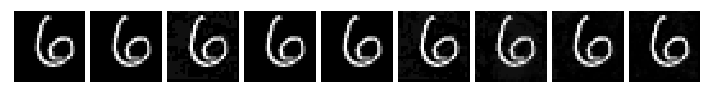

2019-03-04 07:25:02,274 [4992] INFO     __main__: [[6 6 6 6 6 6 6 6 6]]
2019-03-04 07:25:02,492 [4992] DEBUG    __main__: (28, 28, 3) ()
2019-03-04 07:25:02,726 [4992] DEBUG    __main__: (28, 28, 3) ()
2019-03-04 07:25:02,906 [4992] DEBUG    __main__: (28, 28, 3) ()
2019-03-04 07:25:03,073 [4992] DEBUG    __main__: (28, 28, 3) ()
2019-03-04 07:25:03,236 [4992] DEBUG    __main__: (28, 28, 3) ()
2019-03-04 07:25:03,422 [4992] DEBUG    __main__: (28, 28, 3) ()
2019-03-04 07:25:03,651 [4992] DEBUG    __main__: (28, 28, 3) ()
2019-03-04 07:25:03,836 [4992] DEBUG    __main__: (28, 28, 3) ()
2019-03-04 07:25:04,011 [4992] DEBUG    __main__: (28, 28, 3) ()


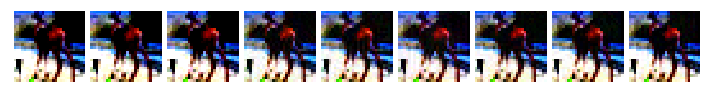

2019-03-04 07:25:04,300 [4992] INFO     __main__: [[4 4 4 4 4 4 4 4 4]]


In [52]:
visual('/Users/xu/Storage/data', 100)